# Przetwarzanie sygnałów

## Zadanie 1

#### a) Przeanalizuj poniższy skrypt

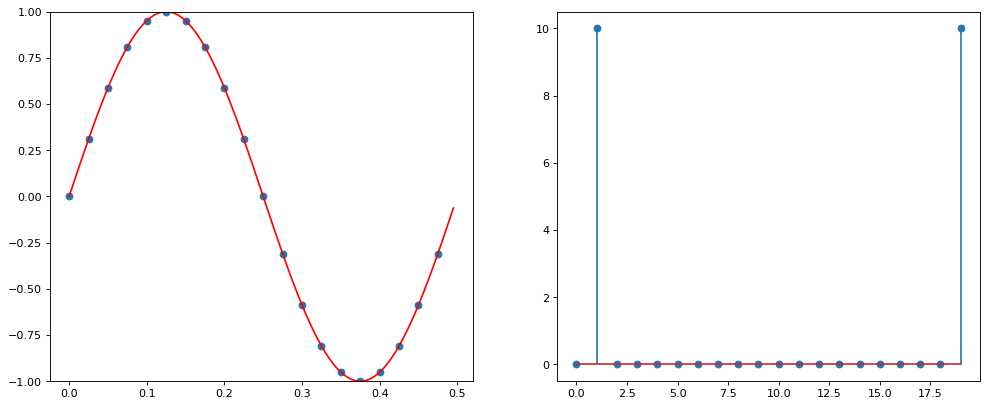

In [ ]:
from pylab import *
from numpy import *
import math
from ipywidgets import *

#--- Definiujemy sygnal wejsciowy
A = 1        # Amplituda sygnalu
F = 2.0      # Czestotliwosc sygnalu [Hz]
T = 1/F      # Okres sygnalu [s]
f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

#--- Probkujemy sygnal
LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
w = 40       # Częstotliwość probkowania [Hz]
TW = 1/w     # Okres probkowania [s] (co ile sekund pobieramy próbkę)

t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
n = len(t)                 # Liczba próbek

signal = f(t)   #wywyołanie sygnału do analizy

#--- Rysujemy sygnał (niebieskie kółka)
fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
ax.plot(t, signal, 'o')

#--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
base_t = np.arange(0, LP * T, 1/200)
base_signal = f(base_t)
ax.plot(base_t, base_signal, linestyle='-', color='red')
ax.set_ylim([min(base_signal), max(base_signal)])

#--- Wykonujemy FFT
signal1 = fft.fft(signal) #transformowany
signal1 = abs(signal1) # moduł

#--- Rysujemy FFT
ax = fig.add_subplot(122)
ymax = max(signal1)
#ax.set_ylim([0.0, max(1.1*ymax, 3.0)])

freqs = range(n)
stem(freqs, signal1, '-*')

**UWAGA**: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniac parametry danej funkcji i na bieżąco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [2]:
def prosta(a=2, b=0):
    x = np.linspace(-5, 5, 100, endpoint=False) # punkty na osi OX [s]
    f = lambda x : a*x + b
    y = f(x)   
    
    fig = plt.figure(figsize=(6, 3), dpi=80)
    ax = fig.add_subplot(111)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.plot(x, y)

interact(prosta, a=(-5,5,0.5), b=(-5,5,0.5))

interactive(children=(FloatSlider(value=2.0, description='a', max=5.0, min=-5.0, step=0.5), FloatSlider(value=…

<function __main__.prosta(a=2, b=0)>

#### b) Zmień częstotliwość próbkowania na 50Hz.

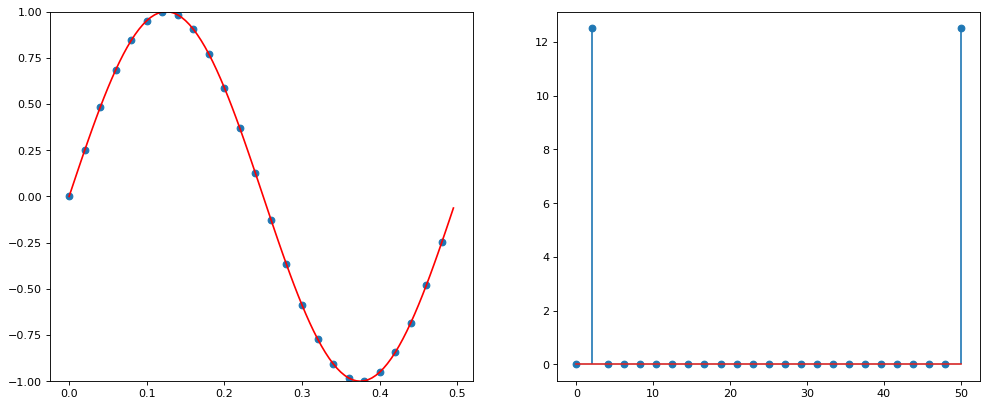

In [ ]:
def plot_FFT(F = 2.0, A = 1, LP = 1, w = 40):
    # A = 1        # Amplituda sygnalu
    # F = 2.0      # Czestotliwosc sygnalu [Hz]
    T = 1/F        # Okres sygnalu [s]
    f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    # LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
    # w = 40       # Częstotliwość probkowania [Hz]
    TW = 1/w
    
    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek
    signal = f(t)   #wywyołanie sygnału do analizy

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal) #transformowany
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)

    freqs = range(n)
    stem(freqs, signal1, '-*')

plot_FFT(w=50)

#### c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!)  Hz, gdzie  jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

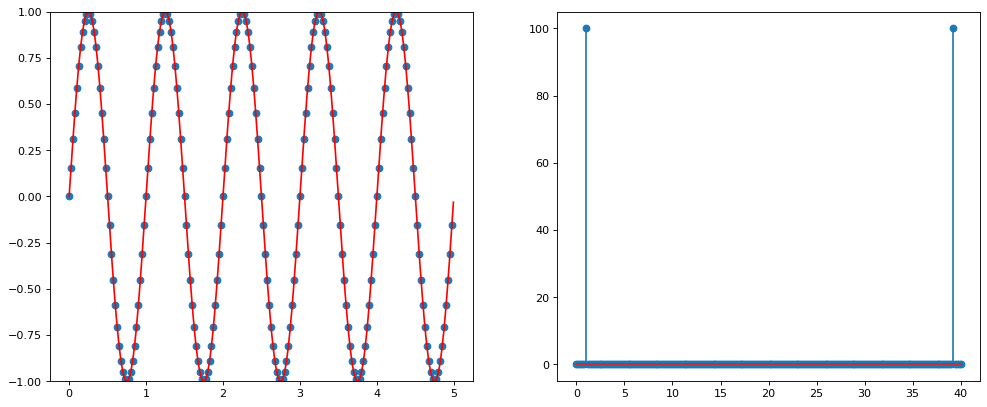

In [15]:
def plot_FFT(F = 2.0, A = 1, LP = 1, w = 40):
    # A = 1        # Amplituda sygnalu
    # F = 2.0      # Czestotliwosc sygnalu [Hz]
    T = 1/F        # Okres sygnalu [s]
    f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    # LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
    # w = 40       # Częstotliwość probkowania [Hz]
    TW = 1/w
    
    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek
    signal = f(t)   #wywyołanie sygnału do analizy

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal) #transformowany
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)

    freqs = linspace(0,w,n) #zmianna
    stem(freqs, signal1, '-*')

plot_FFT(F=1,LP=5)

#### d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

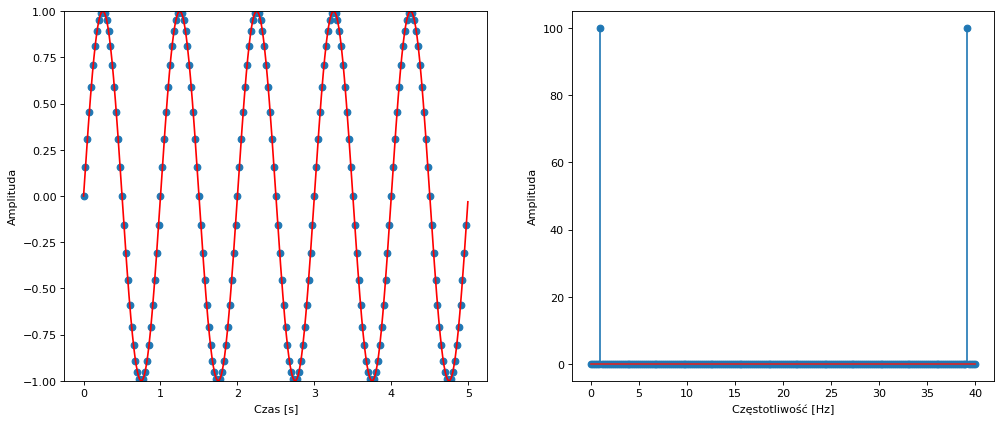

In [22]:
def plot_FFT(F = 2.0, A = 1, LP = 1, w = 40):
    # A = 1        # Amplituda sygnalu
    # F = 2.0      # Czestotliwosc sygnalu [Hz]
    T = 1/F        # Okres sygnalu [s]
    f = lambda t : A * np.sin(2*pi*t*F)    # Def. analizowanej funkcji (sygnalu)

    # LP = 1       # Liczba analizowanych pełnych okresów sygnalu (okresow)
    # w = 40       # Częstotliwość probkowania [Hz]
    TW = 1/w
    
    t = np.arange(0, LP*T, TW) # Momenty, w których pobieramy próbki (oś OX)
    n = len(t)                 # Liczba próbek
    signal = f(t)   #wywyołanie sygnału do analizy

    #--- Rysujemy sygnał (niebieskie kółka)
    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)
    ax.plot(t, signal, 'o')

    #--- Rysujemy sygnał przed spróbkowaniem (dla wizualizacji)
    base_t = np.arange(0, LP * T, 1/200)
    base_signal = f(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_xlabel("Czas [s]")
    ax.set_ylabel("Amplituda")

    #--- Wykonujemy FFT
    signal1 = fft.fft(signal) #transformowany
    signal1 = abs(signal1) # moduł

    #--- Rysujemy FFT
    ax = fig.add_subplot(122)
    ymax = max(signal1)
    ax.set_xlabel("Częstotliwość [Hz]")
    ax.set_ylabel("Amplituda")

    freqs = linspace(0,w,n)
    stem(freqs, signal1, '-*')

plot_FFT(F=1,LP=5)

#### e) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla czestotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. <font color='red'>Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy</font>? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. <font color='red'>Dlaczego uzyskano taki wynik</font>?

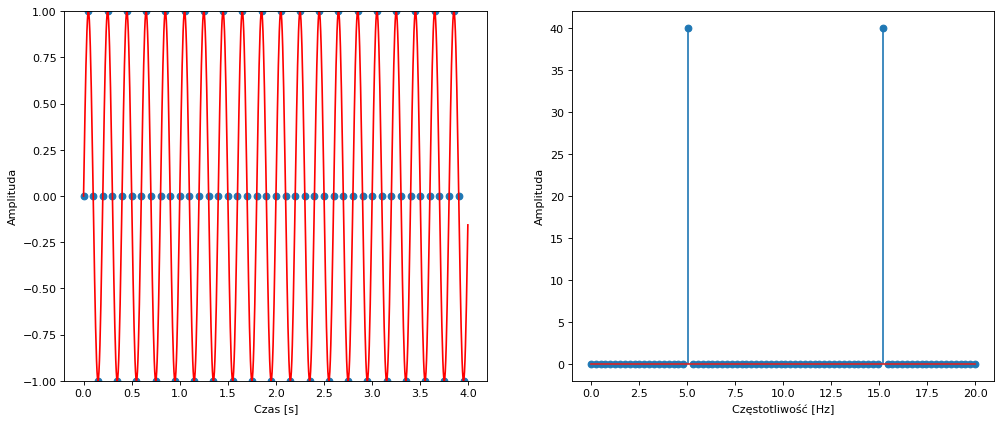

In [ ]:
plot_FFT(F=5, w=20,LP=20)

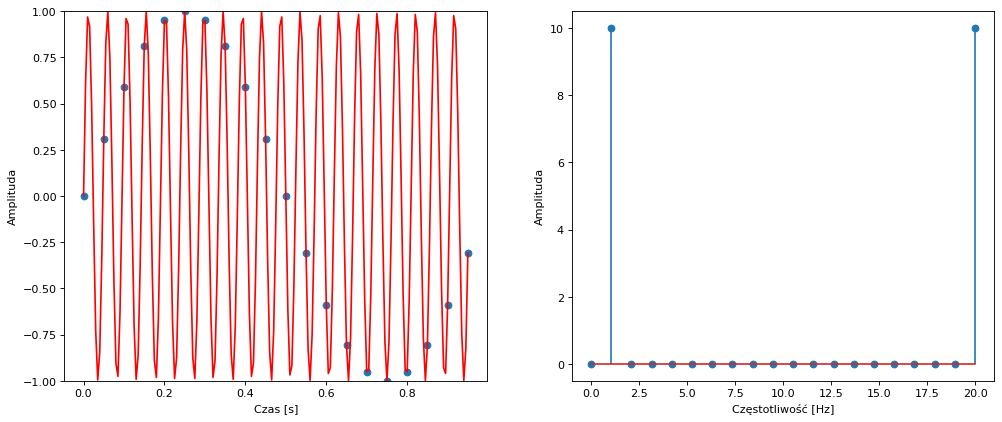

In [ ]:
plot_FFT(F=21, w=20,LP=20)

 - Nie można rozpoznać funkcji, ponieważ jest dobrana nie odpowiednia ilość próbek i przebiegów
 - Odczytana częstotliwość wynosi ok.1Hz ponieważ niepoprawdnie dobrane próbki tworzą właśnie taki przebieg.

#### f) Porównaj spektrum funkcji $sin(F*2\pi t)$, $2sin(F*2\pi t)$ i $3sin(F*2\pi t)$. <font color='red'>Jak zmienia się wartość na osi OY na wykresie spektrum</font>?

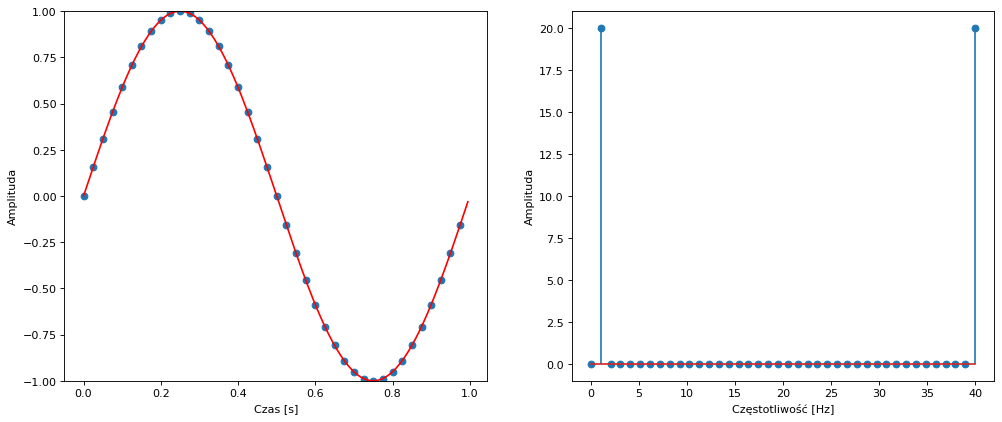

In [25]:
# F=1, A=1, LP=1
plot_FFT(F=1, A=1, LP=1)

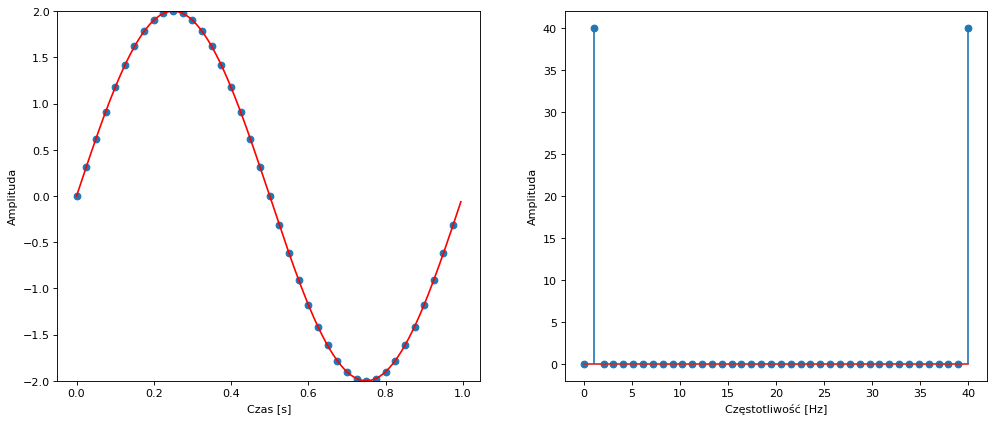

In [ ]:
# F=1, A=2, LP=1
plot_FFT(F=1, A=2, LP=1)

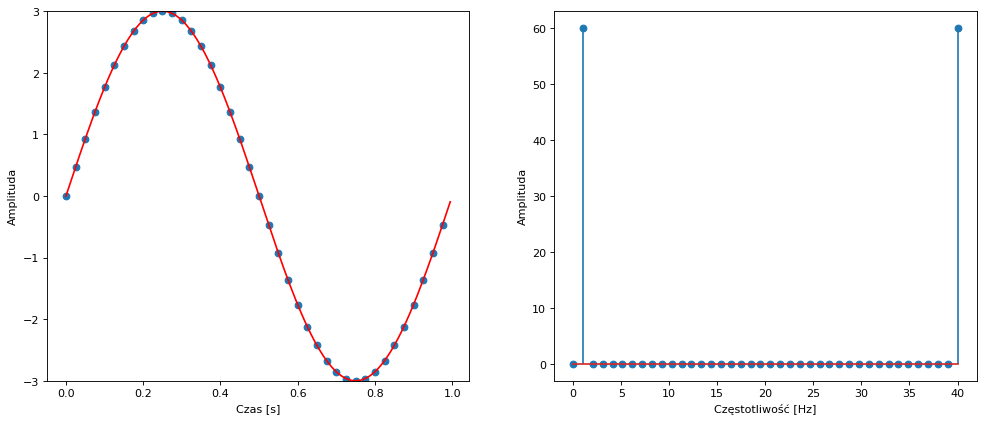

In [27]:
# F=1, A=3, LP=1
plot_FFT(F=1, A=3, LP=1)

 - Oś OY rośnie wprost proporcjonalnie do amplitudy.

#### g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, $T=1s$? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(F*2\pi t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

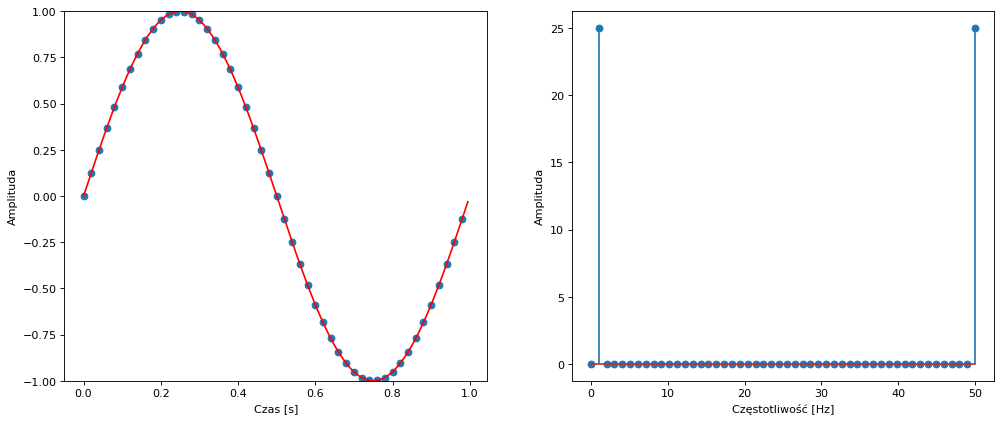

In [28]:
plot_FFT(F=1,w=50,LP=1)

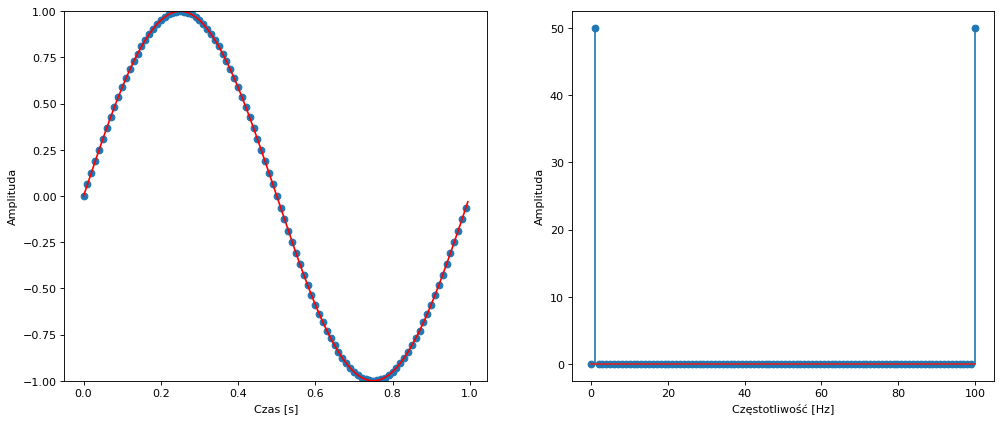

In [29]:
plot_FFT(F=1,w=100,LP=1)

 - Ilość punktów na wykresach jest proporcjonalna do częstotliwości próbkowania (dla 50, 50 a dla 100, 100).
 - 

#### h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji (tu fajnie użyć interact), częstotliwości próbkowania oraz rozważanych liczb punktów. Pamiętaj o wysokim LP.

## Zadanie 2

#### Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej. Pamiętaj aby przeskalować oś OX na wykresie spektrum. Możesz przyjąć jako rozpatrywany okres rok, wówczas częstotliwość próbkowania będzie wynosiła 12.

## Zadanie 3

#### Proste filtrowanie. Wykreśl sygnał sin(2*pi*t) + sin(4*pi*t), T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

## Zadanie 4

#### Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości.